In [1]:
import pandas as pd
import numpy as np

In [2]:
column_names= ['classes', 'cap-shape', 'cap-surface', 'cap-color','bruises','odor','gill-attachment','gill-spacing','gill-size','gill-color','stalk-shape','stalk-root','stalk-surface-above-ring','stalk-surface-below-ring','stalk-color-above-ring','stalk-color-below-ring','veil-type','veil-color','ring-number','ring-type','spore-print-color','population','habitat']
a = "https://raw.githubusercontent.com/YihangSun123/AIM-5001/master/agaricus-lepiota.data"
df = pd.read_csv(a, names=column_names)
df

,classes,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


# Phase I: Data Acquisition, Data Preparation & Exploratory Data Analysis 

In [3]:
df1=df.loc[:,['classes','odor','bruises','habitat'] ]
df1

,classes,odor,bruises,habitat
0,p,p,t,u
1,e,a,t,g
2,e,l,t,m
3,p,p,t,u
4,e,n,f,g
...,...,...,...,...
8119,e,n,f,l
8120,e,n,f,l
8121,e,n,f,l
8122,p,y,f,l


In [4]:
df1['classes'].replace('e', '1', inplace=True)
df1

,classes,odor,bruises,habitat
0,p,p,t,u
1,1,a,t,g
2,1,l,t,m
3,p,p,t,u
4,1,n,f,g
...,...,...,...,...
8119,1,n,f,l
8120,1,n,f,l
8121,1,n,f,l
8122,p,y,f,l


In [5]:
df1['classes'].replace('p', '0', inplace=True)
df1

,classes,odor,bruises,habitat
0,0,p,t,u
1,1,a,t,g
2,1,l,t,m
3,0,p,t,u
4,1,n,f,g
...,...,...,...,...
8119,1,n,f,l
8120,1,n,f,l
8121,1,n,f,l
8122,0,y,f,l


In [6]:
df1.describe()

,classes,odor,bruises,habitat
count,8124,8124,8124,8124
unique,2,9,2,7
top,1,n,f,d
freq,4208,3528,4748,3148


In [7]:
odor_dummies = pd.get_dummies(df1.odor, prefix='odor')
df2 = pd.concat([df1, odor_dummies], axis=1)
df2

,classes,odor,bruises,habitat,odor_a,odor_c,odor_f,odor_l,odor_m,odor_n,odor_p,odor_s,odor_y
0,0,p,t,u,0,0,0,0,0,0,1,0,0
1,1,a,t,g,1,0,0,0,0,0,0,0,0
2,1,l,t,m,0,0,0,1,0,0,0,0,0
3,0,p,t,u,0,0,0,0,0,0,1,0,0
4,1,n,f,g,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,1,n,f,l,0,0,0,0,0,1,0,0,0
8120,1,n,f,l,0,0,0,0,0,1,0,0,0
8121,1,n,f,l,0,0,0,0,0,1,0,0,0
8122,0,y,f,l,0,0,0,0,0,0,0,0,1


In [8]:
habitat_dummies = pd.get_dummies(df2.habitat, prefix='habitat')
df3 = pd.concat([df2, habitat_dummies], axis=1)
df3

,classes,odor,bruises,habitat,odor_a,odor_c,odor_f,odor_l,odor_m,odor_n,odor_p,odor_s,odor_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,p,t,u,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
1,1,a,t,g,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,1,l,t,m,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
3,0,p,t,u,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
4,1,n,f,g,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,1,n,f,l,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
8120,1,n,f,l,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
8121,1,n,f,l,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
8122,0,y,f,l,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0


In [9]:
df4=df3.loc[:,['classes','odor_a','odor_c','odor_f','odor_l','odor_m','odor_n','odor_p','odor_s','odor_y'] ]
df4

,classes,odor_a,odor_c,odor_f,odor_l,odor_m,odor_n,odor_p,odor_s,odor_y
0,0,0,0,0,0,0,0,1,0,0
1,1,1,0,0,0,0,0,0,0,0
2,1,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0
4,1,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
8119,1,0,0,0,0,0,1,0,0,0
8120,1,0,0,0,0,0,1,0,0,0
8121,1,0,0,0,0,0,1,0,0,0
8122,0,0,0,0,0,0,0,0,0,1


In [10]:
df4.describe()

,odor_a,odor_c,odor_f,odor_l,odor_m,odor_n,odor_p,odor_s,odor_y
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,0.049237,0.023634,0.265879,0.049237,0.004431,0.434269,0.031512,0.070901,0.070901
std,0.216375,0.151914,0.441827,0.216375,0.066425,0.495691,0.174706,0.256675,0.256675
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
df4.sum()

classes    0110111101111011100010111011111011111011111011...
odor_a                                                   400
odor_c                                                   192
odor_f                                                  2160
odor_l                                                   400
odor_m                                                    36
odor_n                                                  3528
odor_p                                                   256
odor_s                                                   576
odor_y                                                   576
dtype: object

In [12]:
df5=df3.loc[:,['classes','bruises'] ]
df5

,classes,bruises
0,0,t
1,1,t
2,1,t
3,0,t
4,1,f
...,...,...
8119,1,f
8120,1,f
8121,1,f
8122,0,f


In [13]:
bruises_dummies = pd.get_dummies(df3.bruises, prefix='bruises')
df6 = pd.concat([df3, bruises_dummies], axis=1)
df6

,classes,odor,bruises,habitat,odor_a,odor_c,odor_f,odor_l,odor_m,odor_n,...,odor_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w,bruises_f,bruises_t
0,0,p,t,u,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
1,1,a,t,g,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,1,l,t,m,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
3,0,p,t,u,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
4,1,n,f,g,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,1,n,f,l,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0
8120,1,n,f,l,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0
8121,1,n,f,l,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0
8122,0,y,f,l,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0


In [14]:
df7=df6.drop(columns=["odor","bruises","habitat"])
df7

,classes,odor_a,odor_c,odor_f,odor_l,odor_m,odor_n,odor_p,odor_s,odor_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w,bruises_f,bruises_t
0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1
1,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
2,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1
4,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0
8120,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0
8121,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0
8122,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0


In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='odor', ylabel='Count'>

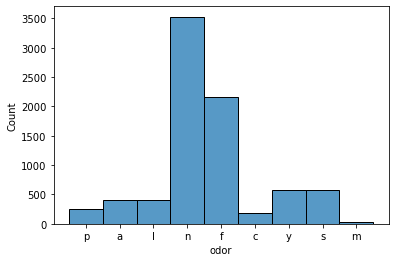

In [38]:
sns.histplot( data=df, x='odor')

mushroom of none odor is most.

<AxesSubplot:xlabel='bruises', ylabel='Count'>

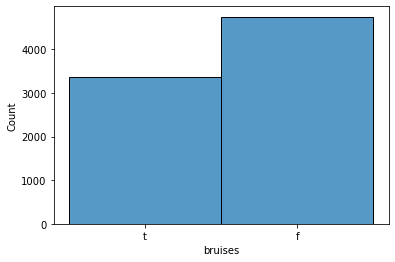

In [39]:
sns.histplot( data=df, x='bruises')

no bruises is more than bruises.

<AxesSubplot:xlabel='habitat', ylabel='Count'>

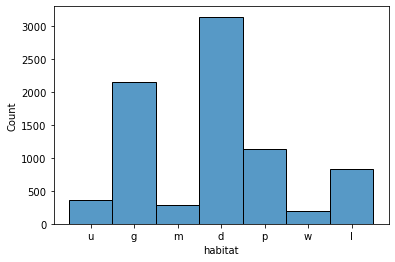

In [37]:
sns.histplot( data=df, x='habitat')

habitat of woods has most mushroom, and grasses next.

<AxesSubplot:xlabel='odor', ylabel='Count'>

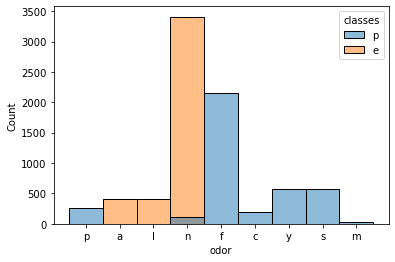

In [40]:
sns.histplot(x="odor", hue="classes", data=df)

a,i are edibe.
f,c,y,s,m are poisonous.
n e>p.

<AxesSubplot:xlabel='bruises', ylabel='Count'>

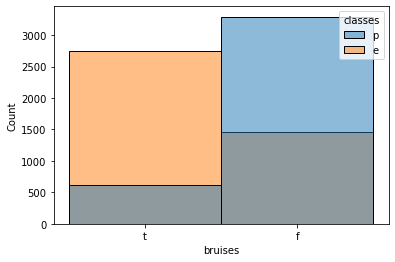

In [41]:
sns.histplot(x="bruises", hue="classes", data=df)

bruiuses e>p
no bruiuses P>e

<AxesSubplot:xlabel='habitat', ylabel='Count'>

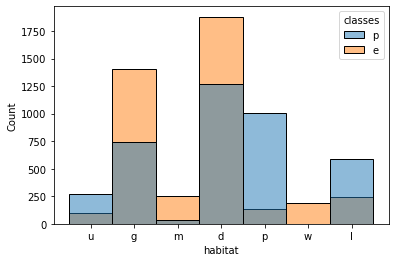

In [42]:
sns.histplot(x="habitat", hue="classes", data=df)

g,m,d,w:e>p
u,p,i: p>e

# Build Predictive Models

In [16]:
df7

,classes,odor_a,odor_c,odor_f,odor_l,odor_m,odor_n,odor_p,odor_s,odor_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w,bruises_f,bruises_t
0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1
1,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
2,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1
4,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0
8120,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0
8121,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0
8122,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0


In [17]:
df7.shape

(8124, 19)

In [18]:
df7.classes.describe()

count     8124
unique       2
top          1
freq      4208
Name: classes, dtype: object

In [19]:
4208/df7.shape[0]

0.517971442639094

edible is 51.80%

In [20]:
train=df7[0:4062]
test=df7[4062:8123]

In [21]:
train.isnull().sum()

classes      0
odor_a       0
odor_c       0
odor_f       0
odor_l       0
odor_m       0
odor_n       0
odor_p       0
odor_s       0
odor_y       0
habitat_d    0
habitat_g    0
habitat_l    0
habitat_m    0
habitat_p    0
habitat_u    0
habitat_w    0
bruises_f    0
bruises_t    0
dtype: int64

In [22]:
test.isnull().sum()

classes      0
odor_a       0
odor_c       0
odor_f       0
odor_l       0
odor_m       0
odor_n       0
odor_p       0
odor_s       0
odor_y       0
habitat_d    0
habitat_g    0
habitat_l    0
habitat_m    0
habitat_p    0
habitat_u    0
habitat_w    0
bruises_f    0
bruises_t    0
dtype: int64

In [23]:
impute_value = train['odor'].median()
train['odor'] = train['odor'].fillna(impute_value)
test['odor'] = test['odor'].fillna(impute_value)

KeyError: 'odor'

In [ ]:
predictors = df7['odor', 'bruises', 'habitat']
X_train = train[predictors].values
X_test = test[predictors].values
y_train = train['edible'].values
X_train[:5]